In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
order_report = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\cointab\Company X - Order Report.xlsx")

sku_master = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\cointab\Company X - SKU Master.xlsx")

df_pincode_zone = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\cointab\Company X - Pincode Zones.xlsx")

df_invoice = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\cointab\Courier Company - Invoice.xlsx")

df_rates = pd.read_excel(r"C:\Users\Lenovo\OneDrive\Desktop\cointab\Courier Company - Rates.xlsx")


# EDA - Company X

In [3]:
# Merging company X data (X_order_report + X_SKU_master)

In [4]:
merged_data=order_report.merge(sku_master,on='SKU',how='right')
merged_data.head()

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001808801,8904223815682,1.0,210
1,2001820978,8904223815859,1.0,165
2,2001811363,8904223815859,1.0,165
3,2001811363,8904223815859,1.0,165
4,2001808801,8904223815859,1.0,165


In [5]:
#check null
merged_data.isnull().sum()

ExternOrderNo    0
SKU              0
Order Qty        0
Weight (g)       0
dtype: int64

In [6]:
#check duplicates
merged_data.duplicated().sum()

#drop duplicates
merged_data.drop_duplicates(inplace=True)

merged_data.duplicated().sum() 

0

In [7]:
merged_data.describe()

,ExternOrderNo,Order Qty,Weight (g)
count,3.980000e+02,398.000000,398.000000
mean,2.001811e+09,1.296482,180.736181
std,5.196911e+03,0.921360,91.529287
min,2.001806e+09,1.000000,10.000000
25%,2.001807e+09,1.000000,120.250000
50%,2.001809e+09,1.000000,133.000000
75%,2.001812e+09,1.000000,240.000000
max,2.001827e+09,8.000000,600.000000


In [8]:
# Max orders - 8
# Max Weight - 600 g

# Pincode data of company X 

In [9]:
df_pincode_zone 

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d
...,...,...,...
119,121003,325207,b
120,121003,303702,b
121,121003,313301,b
122,121003,173212,e


In [10]:
df_pincode_zone.isnull().sum()

Warehouse Pincode    0
Customer Pincode     0
Zone                 0
dtype: int64

In [11]:
#check duplicates
df_pincode_zone.duplicated().sum()

#drop duplicates
df_pincode_zone.drop_duplicates(inplace=True)

df_pincode_zone.duplicated().sum()

0

In [12]:
#To make statistical analysis of pincodes to make sense converting them to category type datatypes
X_pin_cat=df_pincode_zone.select_dtypes(include=['int64']).astype('category')

In [13]:
df_pincode_zone.drop(['Warehouse Pincode','Customer Pincode'],axis=1,inplace=True)

In [14]:
df_pincode_zone

,Zone
0,d
1,d
2,d
3,b
4,d
...,...
114,b
115,b
119,b
120,b


In [15]:
df_pincode_zone=pd.concat([df_pincode_zone,X_pin_cat],axis=1)
df_pincode_zone

,Zone,Warehouse Pincode,Customer Pincode
0,d,121003,507101
1,d,121003,486886
2,d,121003,532484
3,b,121003,143001
4,d,121003,515591
...,...,...,...
114,b,121003,324008
115,b,121003,302020
119,b,121003,325207
120,b,121003,303702


In [16]:
df_pincode_zone.describe()

,Zone,Warehouse Pincode,Customer Pincode
count,108,108,108
unique,3,1,108
top,b,121003,140301
freq,64,108,1


In [17]:
# Most orders belong to zone b i.e., 64
# Most orders are shipped from '121003' Pincode i.e., 108

<AxesSubplot:>

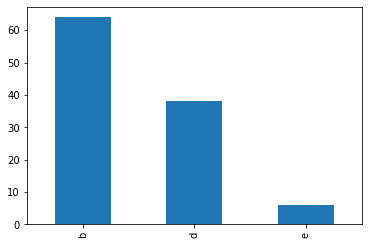

In [18]:
#Total pincodes beonging to zones

df_pincode_zone['Zone'].value_counts().plot.bar()

In [19]:
# most pincodes belong to zone b

# Courier company's data.

In [20]:
df_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [21]:
df_invoice.shape

(124, 8)

In [22]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AWB Code              124 non-null    int64  
 1   Order ID              124 non-null    int64  
 2   Charged Weight        124 non-null    float64
 3   Warehouse Pincode     124 non-null    int64  
 4   Customer Pincode      124 non-null    int64  
 5   Zone                  124 non-null    object 
 6   Type of Shipment      124 non-null    object 
 7   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


In [23]:
df_invoice['Customer Pincode']=df_invoice['Customer Pincode'].astype('category')
df_invoice['Warehouse Pincode']=df_invoice['Warehouse Pincode'].astype('category')

In [24]:
df_invoice.describe()

,AWB Code,Order ID,Charged Weight,Billing Amount (Rs.)
count,1.240000e+02,1.240000e+02,124.000000,124.000000
mean,1.091118e+12,2.001811e+09,0.956048,110.066129
std,1.473661e+06,5.167329e+03,0.662815,64.060832
min,1.091117e+12,2.001806e+09,0.150000,33.000000
25%,1.091117e+12,2.001807e+09,0.667500,86.700000
50%,1.091117e+12,2.001809e+09,0.725000,90.200000
75%,1.091119e+12,2.001812e+09,1.100000,135.000000
max,1.091122e+12,2.001827e+09,4.130000,403.800000


In [25]:
# Most Charged weight is 4.13
# Highest billing amount is found to be 403.8 Rs.

In [26]:
df_invoice[['Warehouse Pincode','Customer Pincode']].describe()

,Warehouse Pincode,Customer Pincode
count,124,124
unique,1,108
top,121003,302017
freq,124,5


In [27]:
df_rates

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [28]:
df_rates.shape

(1, 20)

In [29]:
df_rates.isnull().sum()

fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         0
rto_a_additional    0
rto_b_fixed         0
rto_b_additional    0
rto_c_fixed         0
rto_c_additional    0
rto_d_fixed         0
rto_d_additional    0
rto_e_fixed         0
rto_e_additional    0
dtype: int64

# Assigning Weight slabs (Company X)

In [30]:
merged_data.head()

,ExternOrderNo,SKU,Order Qty,Weight (g)
0,2001808801,8904223815682,1.0,210
1,2001820978,8904223815859,1.0,165
2,2001811363,8904223815859,1.0,165
4,2001808801,8904223815859,1.0,165
5,2001808675,8904223815859,1.0,165


In [31]:
merged_data['Total Weight (kg)']=(merged_data['Weight (g)']*merged_data['Order Qty'])/1000

In [32]:
merged_data.head()

,ExternOrderNo,SKU,Order Qty,Weight (g),Total Weight (kg)
0,2001808801,8904223815682,1.0,210,0.210
1,2001820978,8904223815859,1.0,165,0.165
2,2001811363,8904223815859,1.0,165,0.165
4,2001808801,8904223815859,1.0,165,0.165
5,2001808675,8904223815859,1.0,165,0.165


<AxesSubplot:ylabel='Total Weight (kg)'>

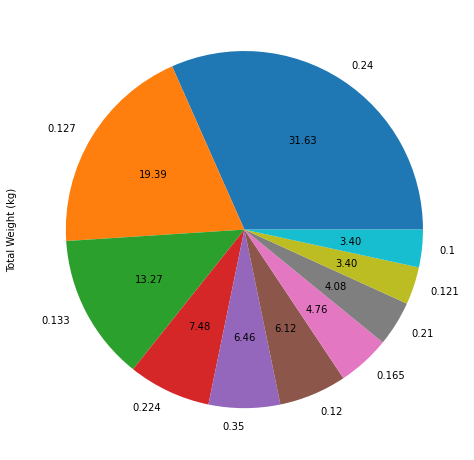

In [33]:
plt.figure(figsize=(8,10))
merged_data['Total Weight (kg)'].value_counts().sort_values(ascending=False).head(10).plot.pie(autopct='%.2f')

In [34]:
# Most number of orders total weight is around 240 gm (31.63% of total orders) followed by 127
# (19.39% of total order)

In [35]:
def weight_slab(wt):
    if wt<=0.5:
        return 0.5
    elif wt>0.5 and wt<=1:
        return 1
    elif wt>1 and wt<=1.5:
        return 1.5
    elif wt>1.5 and wt<=2:
        return 2
    else:
        return int(wt)+0.5

In [36]:
merged_data['Weight Slab company X']=merged_data['Total Weight (kg)'].apply(weight_slab)

In [37]:
merged_data

,ExternOrderNo,SKU,Order Qty,Weight (g),Total Weight (kg),Weight Slab company X
0,2001808801,8904223815682,1.0,210,0.210,0.5
1,2001820978,8904223815859,1.0,165,0.165,0.5
2,2001811363,8904223815859,1.0,165,0.165,0.5
4,2001808801,8904223815859,1.0,165,0.165,0.5
5,2001808675,8904223815859,1.0,165,0.165,0.5
...,...,...,...,...,...,...
396,2001806733,8904223819512,1.0,210,0.210,0.5
397,2001811306,8904223819543,1.0,300,0.300,0.5
398,2001827036,SACHETS001,1.0,10,0.010,0.5
399,2001825261,SACHETS001,1.0,10,0.010,0.5


<AxesSubplot:>

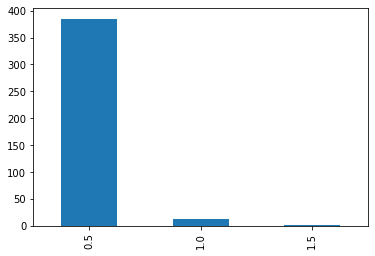

In [38]:
merged_data['Weight Slab company X'].value_counts().plot.bar()

In [39]:
merged_data=merged_data.rename(columns={'ExternOrderNo':'Order ID'})
merged_data.head()

,Order ID,SKU,Order Qty,Weight (g),Total Weight (kg),Weight Slab company X
0,2001808801,8904223815682,1.0,210,0.210,0.5
1,2001820978,8904223815859,1.0,165,0.165,0.5
2,2001811363,8904223815859,1.0,165,0.165,0.5
4,2001808801,8904223815859,1.0,165,0.165,0.5
5,2001808675,8904223815859,1.0,165,0.165,0.5


In [40]:
courier_invoice_X = df_pincode_zone.drop_duplicates(subset=['Customer Pincode'])
courier_X=df_invoice[['Order ID','AWB Code','Customer Pincode','Type of Shipment']]
pincode_merged_courier=courier_X.merge(courier_invoice_X,on='Customer Pincode')
pincode_merged_courier.sample()
pincode_merged_courier=pincode_merged_courier.rename(columns={'Zone':'Zone as per X'})
pincode_merged_courier

,Order ID,AWB Code,Customer Pincode,Type of Shipment,Zone as per X,Warehouse Pincode
0,2001806232,1091117222124,507101,Forward charges,d,121003
1,2001806273,1091117222194,486886,Forward charges,d,121003
2,2001806408,1091117222931,532484,Forward charges,d,121003
3,2001806458,1091117223244,143001,Forward charges,b,121003
4,2001807012,1091117229345,515591,Forward charges,d,121003
...,...,...,...,...,...,...
119,2001811039,1091117904860,302020,Forward charges,b,121003
120,2001811305,1091121846136,302020,Forward charges,b,121003
121,2001812941,1091118551656,325207,Forward charges,b,121003
122,2001809383,1091117614452,303702,Forward and RTO charges,b,121003


In [41]:
merged_data_X_pincode_courier=merged_data.merge(pincode_merged_courier,on='Order ID')
merged_data_X_pincode_courier

,Order ID,SKU,Order Qty,Weight (g),Total Weight (kg),Weight Slab company X,AWB Code,Customer Pincode,Type of Shipment,Zone as per X,Warehouse Pincode
0,2001808801,8904223815682,1.0,210,0.210,0.5,1091117437680,335001,Forward charges,b,121003
1,2001808801,8904223815859,1.0,165,0.165,0.5,1091117437680,335001,Forward charges,b,121003
2,2001808801,8904223815866,2.0,113,0.226,0.5,1091117437680,335001,Forward charges,b,121003
3,2001808801,8904223817273,2.0,65,0.130,0.5,1091117437680,335001,Forward charges,b,121003
4,2001820978,8904223815859,1.0,165,0.165,0.5,1091120922803,313301,Forward charges,b,121003
...,...,...,...,...,...,...,...,...,...,...,...
393,2001809917,8904223819505,1.0,210,0.210,0.5,1091121482593,831006,Forward and RTO charges,d,121003
394,2001809917,8904223819499,1.0,210,0.210,0.5,1091121482593,831006,Forward and RTO charges,d,121003
395,2001809917,8904223819512,1.0,210,0.210,0.5,1091121482593,831006,Forward and RTO charges,d,121003
396,2001806885,8904223819499,2.0,210,0.420,0.5,1091117229776,208019,Forward charges,b,121003


# Assigning Weight slabs (Courier Company)

In [42]:
df_invoice.head()

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


<AxesSubplot:ylabel='Charged Weight'>

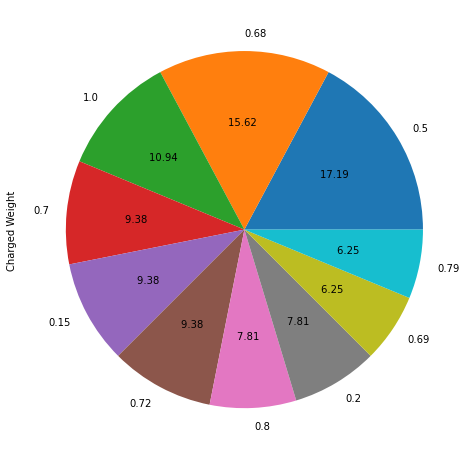

In [43]:
plt.figure(figsize=(8,10))
df_invoice['Charged Weight'].value_counts().sort_values(ascending=False).head(10).plot.pie(autopct='%.2f ')

<AxesSubplot:>

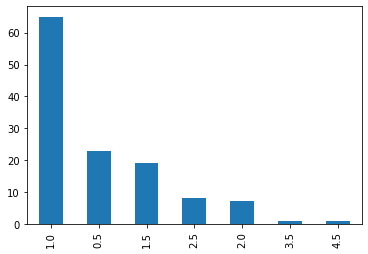

In [44]:
df_invoice['Weight Slab company courier']=df_invoice['Charged Weight'].apply(weight_slab)
df_invoice['Weight Slab company courier'].value_counts().plot.bar()

In [45]:
df_invoice

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),Weight Slab company courier
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.5
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,1.0
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.5
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,1.0
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.5
...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2,1.0
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7,0.5
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4,0.5
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0,0.5


In [46]:
total_Expected_charge=[]
for i in range(len(merged_data_X_pincode_courier)):
    fwd_category='fwd_'+merged_data_X_pincode_courier['Zone as per X'][i]
    fwd_fixed=df_rates[fwd_category+'_fixed'][0]
    fwd_additional=df_rates[fwd_category+'_additional'][0]
    rto_category='rto_'+merged_data_X_pincode_courier['Zone as per X'][i]
    rto_fixed=df_rates[rto_category+'_fixed'][0]
    rto_additional=df_rates[rto_category+'_additional'][0]
    if merged_data_X_pincode_courier['Type of Shipment'][i]=='Forward charges':
        if merged_data_X_pincode_courier['Weight Slab company X'][i]<=0.5:
            total_Expected_charge.append(fwd_fixed)
        else:
            additional_weight=(merged_data_X_pincode_courier['Weight Slab company X'][i]-0.5)/0.5
            total_Expected_charge.append(fwd_fixed+additional_weight*fwd_additional)
    if merged_data_X_pincode_courier['Type of Shipment'][i]=='Forward and RTO charges':
        if merged_data_X_pincode_courier['Weight Slab company X'][i]<=0.5:
            total_Expected_charge.append(fwd_fixed+rto_fixed)
        else:
            additional_weight=(merged_data_X_pincode_courier['Weight Slab company X'][i]-0.5)/0.5
            total_Expected_charge.append(fwd_fixed+additional_weight*(fwd_additional+rto_additional))

merged_data_X_pincode_courier['Expected Charge As Per X (Rs.)']=total_Expected_charge

In [47]:
merged_data_X_pincode_courier

,Order ID,SKU,Order Qty,Weight (g),Total Weight (kg),Weight Slab company X,AWB Code,Customer Pincode,Type of Shipment,Zone as per X,Warehouse Pincode,Expected Charge As Per X (Rs.)
0,2001808801,8904223815682,1.0,210,0.210,0.5,1091117437680,335001,Forward charges,b,121003,33.0
1,2001808801,8904223815859,1.0,165,0.165,0.5,1091117437680,335001,Forward charges,b,121003,33.0
2,2001808801,8904223815866,2.0,113,0.226,0.5,1091117437680,335001,Forward charges,b,121003,33.0
3,2001808801,8904223817273,2.0,65,0.130,0.5,1091117437680,335001,Forward charges,b,121003,33.0
4,2001820978,8904223815859,1.0,165,0.165,0.5,1091120922803,313301,Forward charges,b,121003,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,2001809917,8904223819505,1.0,210,0.210,0.5,1091121482593,831006,Forward and RTO charges,d,121003,86.7
394,2001809917,8904223819499,1.0,210,0.210,0.5,1091121482593,831006,Forward and RTO charges,d,121003,86.7
395,2001809917,8904223819512,1.0,210,0.210,0.5,1091121482593,831006,Forward and RTO charges,d,121003,86.7
396,2001806885,8904223819499,2.0,210,0.420,0.5,1091117229776,208019,Forward charges,b,121003,33.0


In [48]:
merged_data_X_pincode_courier=merged_data_X_pincode_courier.rename(columns={'AWB Code':'AWB Number','Total Weight (kg)':'Total weight as per X (KG)','Weight Slab company X':'Weight slab as per X (KG)','Zone as per X':'Delivery Zone as per X'})

In [49]:
merged_data_X_pincode_courier.head()

,Order ID,SKU,Order Qty,Weight (g),Total weight as per X (KG),Weight slab as per X (KG),AWB Number,Customer Pincode,Type of Shipment,Delivery Zone as per X,Warehouse Pincode,Expected Charge As Per X (Rs.)
0,2001808801,8904223815682,1.0,210,0.210,0.5,1091117437680,335001,Forward charges,b,121003,33.0
1,2001808801,8904223815859,1.0,165,0.165,0.5,1091117437680,335001,Forward charges,b,121003,33.0
2,2001808801,8904223815866,2.0,113,0.226,0.5,1091117437680,335001,Forward charges,b,121003,33.0
3,2001808801,8904223817273,2.0,65,0.130,0.5,1091117437680,335001,Forward charges,b,121003,33.0
4,2001820978,8904223815859,1.0,165,0.165,0.5,1091120922803,313301,Forward charges,b,121003,33.0


In [50]:
merged_data_X_pincode_courier.columns

Index(['Order ID', 'SKU', 'Order Qty', 'Weight (g)',
       'Total weight as per X (KG)', 'Weight slab as per X (KG)', 'AWB Number',
       'Customer Pincode', 'Type of Shipment', 'Delivery Zone as per X',
       'Warehouse Pincode', 'Expected Charge As Per X (Rs.)'],
      dtype='object')

In [51]:
X_company_final=merged_data_X_pincode_courier[['Order ID','AWB Number', 'Total weight as per X (KG)',
                                               'Weight slab as per X (KG)','Delivery Zone as per X',
                                               'Expected Charge As Per X (Rs.)']]

In [52]:
X_company_final.head(5)

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Delivery Zone as per X,Expected Charge As Per X (Rs.)
0,2001808801,1091117437680,0.210,0.5,b,33.0
1,2001808801,1091117437680,0.165,0.5,b,33.0
2,2001808801,1091117437680,0.226,0.5,b,33.0
3,2001808801,1091117437680,0.130,0.5,b,33.0
4,2001820978,1091120922803,0.165,0.5,b,33.0


In [54]:
courier_invoice=df_invoice.rename(columns={'Charged Weight':'Total weight as per Courier Company (KG)','Weight Slab company courier':'Weight slab charged by Courier Company (KG)','Zone':'Delivery Zone charged by Courier Company','Billing Amount (Rs.)':'Charges Billed by Courier Company (Rs.)'})

In [55]:
courier_invoice.sample(5)

,AWB Code,Order ID,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG)
101,1091117436346,2001808475,0.70,121003,335001,d,Forward charges,90.2,1.0
22,1091117327496,2001807976,0.70,121003,400705,d,Forward and RTO charges,172.8,1.0
112,1091117805390,2001810281,0.68,121003,302018,d,Forward charges,90.2,1.0
93,1091117228192,2001806828,0.69,121003,331022,d,Forward charges,90.2,1.0
17,1091117435370,2001808207,0.79,121003,495671,d,Forward charges,90.2,1.0


In [56]:
courier_invoice.columns

Index(['AWB Code', 'Order ID', 'Total weight as per Courier Company (KG)',
       'Warehouse Pincode', 'Customer Pincode',
       'Delivery Zone charged by Courier Company', 'Type of Shipment',
       'Charges Billed by Courier Company (Rs.)',
       'Weight slab charged by Courier Company (KG)'],
      dtype='object')

In [57]:
Courier_company_final=courier_invoice[['Order ID','Total weight as per Courier Company (KG)','Delivery Zone charged by Courier Company','Charges Billed by Courier Company (Rs.)','Weight slab charged by Courier Company (KG)']]

In [58]:
Courier_company_final.head()

,Order ID,Total weight as per Courier Company (KG),Delivery Zone charged by Courier Company,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG)
0,2001806232,1.30,d,135.0,1.5
1,2001806273,1.00,d,90.2,1.0
2,2001806408,2.50,d,224.6,2.5
3,2001806458,1.00,b,61.3,1.0
4,2001807012,0.15,d,45.4,0.5


In [59]:
output_merged=X_company_final.merge(Courier_company_final,on='Order ID')

In [61]:
output_merged.head(5)

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Delivery Zone as per X,Expected Charge As Per X (Rs.),Total weight as per Courier Company (KG),Delivery Zone charged by Courier Company,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG)
0,2001808801,1091117437680,0.210,0.5,b,33.0,0.8,d,90.2,1.0
1,2001808801,1091117437680,0.165,0.5,b,33.0,0.8,d,90.2,1.0
2,2001808801,1091117437680,0.226,0.5,b,33.0,0.8,d,90.2,1.0
3,2001808801,1091117437680,0.130,0.5,b,33.0,0.8,d,90.2,1.0
4,2001820978,1091120922803,0.165,0.5,b,33.0,0.5,d,45.4,0.5


# Difference between expected and Billed charges

In [62]:
output_merged['Difference Between Expected Charges and Billed Charges (Rs.)']=output_merged['Expected Charge As Per X (Rs.)']-output_merged['Charges Billed by Courier Company (Rs.)']

In [63]:
output_data_1=output_merged

In [73]:
output_data_1.head()

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Delivery Zone as per X,Expected Charge As Per X (Rs.),Total weight as per Courier Company (KG),Delivery Zone charged by Courier Company,Charges Billed by Courier Company (Rs.),Weight slab charged by Courier Company (KG),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001808801,1091117437680,0.210,0.5,b,33.0,0.8,d,90.2,1.0,-57.2
1,2001808801,1091117437680,0.165,0.5,b,33.0,0.8,d,90.2,1.0,-57.2
2,2001808801,1091117437680,0.226,0.5,b,33.0,0.8,d,90.2,1.0,-57.2
3,2001808801,1091117437680,0.130,0.5,b,33.0,0.8,d,90.2,1.0,-57.2
4,2001820978,1091120922803,0.165,0.5,b,33.0,0.5,d,45.4,0.5,-12.4


In [65]:
count1=output_merged[output_merged['Difference Between Expected Charges and Billed Charges (Rs.)']==0]['Difference Between Expected Charges and Billed Charges (Rs.)']
total_count1=len(count1)
amount1=count1.sum()
count2=output_merged[output_merged['Difference Between Expected Charges and Billed Charges (Rs.)']<0]['Difference Between Expected Charges and Billed Charges (Rs.)']
total_count2=len(count2)
amount2=abs(output_merged['Difference Between Expected Charges and Billed Charges (Rs.)'].sum())
count3=output_merged[output_merged['Difference Between Expected Charges and Billed Charges (Rs.)']>0]['Difference Between Expected Charges and Billed Charges (Rs.)']
total_count3=len(count3)
amount3=count3.sum()

dict2={'':['Total orders where X has been correctly charged','Total orders where X has been overcharged','Total orders where X has been undercharged'],
        'Count':[total_count1,total_count2,total_count3],
        'Amount(Rs.)':[amount1,amount2,amount3]}

In [66]:
output_data_2=pd.DataFrame(dict2,index=[0,1,2])
output_data_2

,,Count,Amount(Rs.)
0,Total orders where X has been correctly charged,12,0.0
1,Total orders where X has been overcharged,377,31425.5
2,Total orders where X has been undercharged,9,165.2


# Output to Excel

In [70]:
output_data_1.to_excel('Resultant Output.xlsx',index=False)

print('File saved')

File saved


In [71]:
output_data_2.to_excel('Summary.xlsx',index=False)

print('File saved')

File saved
